## Make a program to choose randomly p fraction of the population to infect initially
* Randomly with choosen probability picks 0 and 1 
* We find list of all unique users and then we need to infect a percentage of population
* Again a problem here is that we need to start infecting users only after a particular time
* we need to make this set to be positive or negative

**I propose that there could be atleast two mechanism to start infection**
1. Randomly infect people by choosing them after a particular time
2. Randomly infect people by choosing a particular place at particular time (this is how COVID started)
3. If choosing step 2 then we can randmly infect people who were at that place at a particular time
4. Using alpha as infection rate

In [1]:
import pandas as pd
df = pd.read_csv("processedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

/home/mayuresh/anaconda3/lib/python3.7/site-packages/arcgis/features/_data/geodataset/utils.py:16: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime,


# EXTRA IDEAS
## We can use venue catorgories to define the probabilty of infection
* If it is a closed space we can have more probability 
* If it is public space which is frequented by many we can give more probability
* Also we can give probability of contamination by looking at how many people were there at the place at given time

In [3]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       0          0           0   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       0          0           0   

        InfectionTime        Time  
0                   0  1333476009  
1                   0  1333476025  
2                   0  1333476144  
3                   0  1333476161  
4                   0  1333476180  
...               ...         ...  
227423              0  1360981751  
227424              0  1360981895  
227425              0  1360981996  
227426              0  1360982071  
227427              0  1360982136  

[227428 rows x 13 columns]

# We find all the unique users from whole dataset

In [4]:
import numpy as np

#choosing unique users from list of all user IDs
unique_users =  pd.unique(df["User ID (anonymized)"])#.

print(f"Number of unique users are: {len(unique_users)}")

Number of unique users are: 1083


# Only first few users are active so only infect from them

Below cell infects from users before present before infect time

In [5]:
##############################################################################
# DON' RUN THIS CELL IF YOU WANT TO RANDOMLY INFECT USERS FROM WHOLE DATASET #
##############################################################################

#THIS CELL IS TO SELECTED ONLY UNIQUE USERS FROM FIRST 2000 CELL
unique_users =  pd.unique((df[:2001])["User ID (anonymized)"])
unique_users
len(unique_users)

613

# Randomly select 10% users to be infected

In [6]:
import datetime
#intial infected percentage
alpha = 0.1

# this is when we are infecting people after a particular time
gen_positive = np.random.choice((1,0),size = len(unique_users), p=[alpha, 1-alpha])

#Choosing the time at which infection begins
infect_time = df.iloc[2000]["Time"]
print(f"Infection time in epoch {infect_time}")
print(f"Infection starts on : {datetime.datetime.fromtimestamp(infect_time).strftime('%c')}")

infections = np.sum(gen_positive)
print(f"Number of infected users: {infections}")

Infection time in epoch 1333559854
Infection starts on : Wed Apr  4 10:17:34 2012
Number of infected users: 61


In [7]:
print(gen_positive,len(gen_positive))
print(unique_users, len(unique_users))

[0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Find all rows of infected users for further infections

In [8]:
#############################
# NO INFECTED CELL TILL NOW #
#############################

df[df["Status"]==1]

Empty DataFrame
Columns: [User ID (anonymized), Venue ID (Foursquare), Venue category ID (Foursquare), Venue category name (Fousquare), Latitude, Longitude, Timezone offset(minutes), UTC time, Status, Iteration, InfectorId, InfectionTime, Time]
Index: []

In [9]:
#Query logic to select only those users whose user id and time matches or those who are positive already
for i in range(len(unique_users)):
    #print(i)
    if gen_positive[i] == 1:
        #Below query gives sets status to 1 if infected userId and time condition matches
        #df["Status"]= np.where( ( (df["User ID (anonymized)"] == unique_users[i]) & (df["Time"] >= infect_time) ) | (df["Status"] == 1),1,0)
        
        #Below query sets Status of all rows of infected user to be equal to 1 otherwise 0
        # | (df["Status"] == 1) this condition helps retain previous set rows, else it will reset to 0
        df["Status"]= np.where((df["User ID (anonymized)"] == unique_users[i]) | (df["Status"] == 1) ,1,0)

In [10]:
##############################
# ALL INFECTED CELL TILL NOW #
##############################
df[df["Status"]==1]

User ID (anonymized)     Venue ID (Foursquare)  \
1                        979  4a43c0aef964a520c6a61fe3   
4                         87  4cf2c5321d18a143951b5cec   
7                        292  4d0cc47f903d37041864bf55   
10                        87  4d8263a73e916dcb8edd80d2   
12                       691  4cb50d599c7ba35de0ef8706   
...                      ...                       ...   
227356                   346  4bab6229f964a5201ea53ae3   
227388                   185  4d3f3c07cb84b60ce1527bab   
227389                   498  4c781867bd346dcbbbf6f0ef   
227400                   185  4c33727a66e40f478904c88b   
227401                   293  4b4fd6d6f964a5203b1727e3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
1            4bf58dd8d48988d1df941735                          Bridge   
4            4bf58dd8d48988d1cb941735                      Food Truck   
7            4bf58dd8d48988d12b951735                     Bus Station   
10           4bf58dd8d48988d155941735                       Gastropub   
12           4bf58dd8d48988d104941735                  Medical Center   
...                               ...                             ...   
227356       4bf58dd8d48988d16d941735                            Caf�   
227388       4bf58dd8d48988d10a951735                            Bank   
227389       4bf58dd8d48988d1f9931735                            Road   
227400       4bf58dd8d48988d172941735                     Post Office   
227401       4bf58dd8d48988d123951735                      Smoke Shop   

         Latitude  Longitude  Timezone offset(minutes)  \
1       40.606800 -74.044170                      -240   
4       40.740104 -73.989658                      -240   
7       40.779422 -73.955341                      -240   
10      40.743483 -73.994009                      -240   
12      40.719762 -74.250014                      -240   
...           ...        ...                       ...   
227356  40.925754 -73.839457                      -300   
227388  40.947823 -74.069842                      -300   
227389  40.628895 -74.005760                      -300   
227400  40.948923 -74.069722                      -300   
227401  40.757141 -73.966970                      -300   

                              UTC time  Status  Iteration  InfectorId  \
1       Tue Apr 03 18:00:25 +0000 2012       1          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       1          0           0   
7       Tue Apr 03 18:04:42 +0000 2012       1          0           0   
10      Tue Apr 03 18:07:15 +0000 2012       1          0           0   
12      Tue Apr 03 18:09:06 +0000 2012       1          0           0   
...                                ...     ...        ...         ...   
227356  Thu Feb 14 11:50:34 +0000 2013       1          0           0   
227388  Sat Feb 16 01:50:51 +0000 2013       1          0           0   
227389  Sat Feb 16 01:51:40 +0000 2013       1          0           0   
227400  Sat Feb 16 02:04:53 +0000 2013       1          0           0   
227401  Sat Feb 16 02:07:42 +0000 2013       1          0           0   

        InfectionTime        Time  
1                   0  1333476025  
4                   0  1333476180  
7                   0  1333476282  
10                  0  1333476435  
12                  0  1333476546  
...               ...         ...  
227356              0  1360842634  
227388              0  1360979451  
227389              0  1360979500  
227400              0  1360980293  
227401              0  1360980462  

[20209 rows x 13 columns]

# This is where infection starts

* set all initial users InfectionTime to infect_time
* set the number of infecting days i.e. 21 here as viral_day
* set tested time to be equal to the upper limit of viral time in epoch time

In [11]:
# Setting infection time for all
df["InfectionTime"] = np.where(df["Status"]==1,infect_time,0)

# We set testing time to be 7 days after infection time
viral_day = 21

df["TestedTime"] = np.where(df["Status"]==1,infect_time + viral_day*24*60*60,0)

count_infected = len(df[df["Status"]==1])
print(f"number of infect rows: {count_infected}")

number of infect rows: 20209


In [12]:
# Looking at the first 10 values to see the information to ascertain work done
df[df["Status"]==1]

User ID (anonymized)     Venue ID (Foursquare)  \
1                        979  4a43c0aef964a520c6a61fe3   
4                         87  4cf2c5321d18a143951b5cec   
7                        292  4d0cc47f903d37041864bf55   
10                        87  4d8263a73e916dcb8edd80d2   
12                       691  4cb50d599c7ba35de0ef8706   
...                      ...                       ...   
227356                   346  4bab6229f964a5201ea53ae3   
227388                   185  4d3f3c07cb84b60ce1527bab   
227389                   498  4c781867bd346dcbbbf6f0ef   
227400                   185  4c33727a66e40f478904c88b   
227401                   293  4b4fd6d6f964a5203b1727e3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
1            4bf58dd8d48988d1df941735                          Bridge   
4            4bf58dd8d48988d1cb941735                      Food Truck   
7            4bf58dd8d48988d12b951735                     Bus Station   
10           4bf58dd8d48988d155941735                       Gastropub   
12           4bf58dd8d48988d104941735                  Medical Center   
...                               ...                             ...   
227356       4bf58dd8d48988d16d941735                            Caf�   
227388       4bf58dd8d48988d10a951735                            Bank   
227389       4bf58dd8d48988d1f9931735                            Road   
227400       4bf58dd8d48988d172941735                     Post Office   
227401       4bf58dd8d48988d123951735                      Smoke Shop   

         Latitude  Longitude  Timezone offset(minutes)  \
1       40.606800 -74.044170                      -240   
4       40.740104 -73.989658                      -240   
7       40.779422 -73.955341                      -240   
10      40.743483 -73.994009                      -240   
12      40.719762 -74.250014                      -240   
...           ...        ...                       ...   
227356  40.925754 -73.839457                      -300   
227388  40.947823 -74.069842                      -300   
227389  40.628895 -74.005760                      -300   
227400  40.948923 -74.069722                      -300   
227401  40.757141 -73.966970                      -300   

                              UTC time  Status  Iteration  InfectorId  \
1       Tue Apr 03 18:00:25 +0000 2012       1          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       1          0           0   
7       Tue Apr 03 18:04:42 +0000 2012       1          0           0   
10      Tue Apr 03 18:07:15 +0000 2012       1          0           0   
12      Tue Apr 03 18:09:06 +0000 2012       1          0           0   
...                                ...     ...        ...         ...   
227356  Thu Feb 14 11:50:34 +0000 2013       1          0           0   
227388  Sat Feb 16 01:50:51 +0000 2013       1          0           0   
227389  Sat Feb 16 01:51:40 +0000 2013       1          0           0   
227400  Sat Feb 16 02:04:53 +0000 2013       1          0           0   
227401  Sat Feb 16 02:07:42 +0000 2013       1          0           0   

        InfectionTime        Time  TestedTime  
1          1333559854  1333476025  1335374254  
4          1333559854  1333476180  1335374254  
7          1333559854  1333476282  1335374254  
10         1333559854  1333476435  1335374254  
12         1333559854  1333476546  1335374254  
...               ...         ...         ...  
227356     1333559854  1360842634  1335374254  
227388     1333559854  1360979451  1335374254  
227389     1333559854  1360979500  1335374254  
227400     1333559854  1360980293  1335374254  
227401     1333559854  1360980462  1335374254  

[20209 rows x 14 columns]

# We need to do following
* We need to find every person that has been infected
* for every person that has been infected we need to find the other person who was at same place and time range
* infect these people with certain probability
* we need to make the person either dead(8%) or cured(92%) after 21 days (7 days testing, 14 days incubation)

In [13]:
# Find all the infected users
infected_users_dataframe = df[df["Status"]==1]
infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
print("Infected Users are: ")
print(infected_users)
#count number of infections
infections = len(infected_users)
print(f"Total infections are: {infections}")
# Infection list stores list of infected people per round of simulation
infection_list = []
infection_list.append(infected_users)

Infected Users are: 
[ 979   87  292  691  445  891  398  889  752  406  816  801  592  272
  468  725  346  539  144   71  820  498   84  371  121  571  185  786
  179  162  300  365  593  969  296  378  826  650  113  415  556  990
  362  370 1082   21  293  971  347  565  161  105  981  363  136  632
   70  132  155  277  851]
Total infections are: 61


In [14]:
#############################################################
# This code is to check if the given code generates correct #
#############################################################
#infected_rows = len(infected_users_dataframe)
#for i in range(infected_rows):
#    infector = infected_users_dataframe.iloc[i]
#    #print(infector)
#    x = list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"]) & ( (df["Time"] >= (infector["Time"]-3600)) & (df["Time"] <= (infector["Time"]+7200)) ))[0])
#    if(len(x)>1):
#        print(x)
#        print(i)

In [15]:
# We need to find all the users who where at the same place as the infected user and in time range of 1 hrs
# 1hr = 3600 seconds
# ITERATING OVER ALL ROWS AND CHECKING TIME
iteration_count = 0
while(infections!=0):
    # we will maintain this variable to fetch only new infections
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")
    infected_rows = len(infected_users_dataframe)
    for i in range(infected_rows):
        print(f"Calculating for infected person: {i} of {infected_rows}")
        infector = infected_users_dataframe.iloc[i]
        
        ##print("Infector is:")
        ##print("###################################################################")
        ##print(infector)
        ##print("###################################################################")
        
        #Cured  or Dead person cannot effect
        if(infector["TestedTime"]< infector["Time"]): 
            print("This person has either been cured or dead... thence no effect!")
            continue
        
        
        # Finding all those prople infector meets after start of infection time
        # meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"])  & (df["Time"] >= infect_time))[0])
        
        # Finding all people that infector meets at infectors time range
        # Meeting Population is the list of indices of the people, not the User Id (anonymized)
        # We are keeping 3 hours time window -2 +4
        
        meeting_population =  list(np.where( (df["Latitude"] == infector["Latitude"]) & (df["Longitude"] == infector["Longitude"]) & ( (df["Time"] >= (infector["Time"]-7200)) & (df["Time"] <= (infector["Time"]+14400)) ))[0])
        
        print("List of people this infector meets: "+str({len(meeting_population)})) 
        ##print(meeting_population)
        ##print(meeting_population)
        
        for index in meeting_population:
            person = df.iloc[index]
            if(person["Status"]==0):
                
                print(f"Non infected person met.................{index}")
                ##print("In range.............................")
                #Find all the entries of this person after this time and set details
                
                person_rows = np.where( (df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0]
                
                ##print("Places where this person has rows")
                ##print(f"Rows of person is : {len(person_rows)}")
                
                # TO MAKE MORE EFFIECIENT
                # https://stackoverflow.com/questions/49447233/python-maintain-multiple-columns-with-np-where
                for k in range(len(person_rows)):
                    df.at[index, "Status"] = 1
                    #print("Status Set")
                    df.at[index, "InfectorId"] = infector["User ID (anonymized)"]
                    #print("Infector Id Set")
                    df.at[index, "InfectionTime"] = person["Time"]
                    #print("Infection Time Set")
                    df.at[index, "TestedTime"] = person["Time"] + viral_day*24*60*60
                    #print("Tested Time Set")
                    df.at[index, "Iteration"] = iteration_count+1
                    #print(df.iloc[index])
                    #print(df)
                    df.at[index, "InfectionLongitude"] = infector["Longitude"]
                    df.at[index, "InfectionLatitude"] = infector["Latitude"]
            else:
                print(f"Met with an already infected person.................{index}")
                #If this person was infected later than when they meets this new infector then update
                if(person["InfectionTime"] > person["Time"]):
                    print("Resetting infector ID... new infector found for infected person")
                    person_rows = np.where( (df["User ID (anonymized)"]==person["User ID (anonymized)"]) & (df["Time"]>=person["Time"]))[0]
                    for k in range(len(person_rows)):
                        #df.at[index, "Status"] = 1
                        #print("Status Set")
                        df.at[index, "InfectorId"] = infector["User ID (anonymized)"]
                        #print("Infector Id Set")
                        df.at[index, "InfectionTime"] = person["Time"]
                        #print("Infection Time Set")
                        df.at[index, "TestedTime"] = person["Time"] + viral_day*24*60*60
                        #print("Tested Time Set")
                        df.at[index, "Iteration"] = iteration_count+1
                        #print(df.iloc[index])
                        #print(df)
                        df.at[index, "InfectionLongitude"] = infector["Longitude"]
                        df.at[index, "InfectionLatitude"] = infector["Latitude"]                    
                
    # Find all the infected users
    # HERE WE MUST ALSO SET CONDITIONS BASED ON ITERATION, FETCH ONLY THAT WERE INFECTED IN THIS ITERATION
    iteration_count += 1
    print(f"Finding new Infections............................Iteration {iteration_count}")
    infected_users_dataframe = df[(df["Status"]==1) & (df["Iteration"]==iteration_count)]
    infected_users = pd.unique(infected_users_dataframe["User ID (anonymized)"])
    infection_list.append(infected_users)
    ##print("Infected Users are: ")
    ##print(infected_users)
    #count number of infections
    print("Infected Users are: ")
    print(infected_users)
    infections = len(infected_users)
    print(f"Total new infections are: {infections} for iteration {iteration_count}") 
    print("#############################################################################")
    print("#############################################################################")
    print("#############################################################################")

df

#############################################################################
#############################################################################
#############################################################################
Calculating for infected person: 0 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1
Resetting infector ID... new infector found for infected person
Calculating for infected person: 1 of 20209
List of people this infector meets: {1}
Met with an already infected person.................4
Resetting infector ID... new infector found for infected person
Calculating for infected person: 2 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7
Resetting infector ID... new infector found for infected person
Calculating for infected person: 3 of 20209
List of people this infector meets: {1}
Met with an already infected person.................10
Resetting infector ID

Calculating for infected person: 42 of 20209
List of people this infector meets: {1}
Met with an already infected person.................288
Resetting infector ID... new infector found for infected person
Calculating for infected person: 43 of 20209
List of people this infector meets: {1}
Met with an already infected person.................289
Resetting infector ID... new infector found for infected person
Calculating for infected person: 44 of 20209
List of people this infector meets: {1}
Met with an already infected person.................290
Resetting infector ID... new infector found for infected person
Calculating for infected person: 45 of 20209
List of people this infector meets: {1}
Met with an already infected person.................292
Resetting infector ID... new infector found for infected person
Calculating for infected person: 46 of 20209
List of people this infector meets: {1}
Met with an already infected person.................294
Resetting infector ID... new infector f

Met with an already infected person.................687
Resetting infector ID... new infector found for infected person
Met with an already infected person.................943
Resetting infector ID... new infector found for infected person
Met with an already infected person.................974
Resetting infector ID... new infector found for infected person
Calculating for infected person: 83 of 20209
List of people this infector meets: {1}
Met with an already infected person.................562
Resetting infector ID... new infector found for infected person
Calculating for infected person: 84 of 20209
List of people this infector meets: {1}
Met with an already infected person.................567
Resetting infector ID... new infector found for infected person
Calculating for infected person: 85 of 20209
List of people this infector meets: {2}
Met with an already infected person.................585
Resetting infector ID... new infector found for infected person
Met with an already infec

Calculating for infected person: 122 of 20209
List of people this infector meets: {1}
Met with an already infected person.................858
Resetting infector ID... new infector found for infected person
Calculating for infected person: 123 of 20209
List of people this infector meets: {1}
Met with an already infected person.................859
Resetting infector ID... new infector found for infected person
Calculating for infected person: 124 of 20209
List of people this infector meets: {1}
Met with an already infected person.................867
Resetting infector ID... new infector found for infected person
Calculating for infected person: 125 of 20209
List of people this infector meets: {1}
Met with an already infected person.................878
Resetting infector ID... new infector found for infected person
Calculating for infected person: 126 of 20209
List of people this infector meets: {3}
Met with an already infected person.................879
Resetting infector ID... new infec

Calculating for infected person: 160 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1070
Resetting infector ID... new infector found for infected person
Calculating for infected person: 161 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1071
Resetting infector ID... new infector found for infected person
Calculating for infected person: 162 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1075
Resetting infector ID... new infector found for infected person
Calculating for infected person: 163 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1085
Resetting infector ID... new infector found for infected person
Calculating for infected person: 164 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1091
Calculating for infected pers

Calculating for infected person: 203 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1336
Resetting infector ID... new infector found for infected person
Calculating for infected person: 204 of 20209
List of people this infector meets: {3}
Met with an already infected person.................1364
Resetting infector ID... new infector found for infected person
Non infected person met.................1538
Non infected person met.................1577
Calculating for infected person: 205 of 20209
List of people this infector meets: {4}
Met with an already infected person.................1257
Met with an already infected person.................1388
Met with an already infected person.................1564
Met with an already infected person.................1783
Resetting infector ID... new infector found for infected person
Calculating for infected person: 206 of 20209
List of people this infector meets: {1}
Met with an already infected per

Calculating for infected person: 241 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1749
Resetting infector ID... new infector found for infected person
Calculating for infected person: 242 of 20209
List of people this infector meets: {2}
Met with an already infected person.................1752
Resetting infector ID... new infector found for infected person
Met with an already infected person.................2139
Calculating for infected person: 243 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1762
Resetting infector ID... new infector found for infected person
Calculating for infected person: 244 of 20209
List of people this infector meets: {1}
Met with an already infected person.................1769
Resetting infector ID... new infector found for infected person
Calculating for infected person: 245 of 20209
List of people this infector meets: {1}
Met with an already infected 

List of people this infector meets: {1}
Met with an already infected person.................2440
Calculating for infected person: 323 of 20209
List of people this infector meets: {1}
Met with an already infected person.................2464
Calculating for infected person: 324 of 20209
List of people this infector meets: {2}
Met with an already infected person.................2469
Met with an already infected person.................2470
Calculating for infected person: 325 of 20209
List of people this infector meets: {2}
Met with an already infected person.................2469
Met with an already infected person.................2470
Calculating for infected person: 326 of 20209
List of people this infector meets: {1}
Met with an already infected person.................2479
Calculating for infected person: 327 of 20209
List of people this infector meets: {1}
Met with an already infected person.................2481
Calculating for infected person: 328 of 20209
List of people this infector

Met with an already infected person.................3529
Met with an already infected person.................3599
Non infected person met.................3649
Calculating for infected person: 405 of 20209
List of people this infector meets: {2}
Met with an already infected person.................3340
Met with an already infected person.................3597
Calculating for infected person: 406 of 20209
List of people this infector meets: {1}
Met with an already infected person.................3341
Calculating for infected person: 407 of 20209
List of people this infector meets: {1}
Met with an already infected person.................3343
Calculating for infected person: 408 of 20209
List of people this infector meets: {6}
Met with an already infected person.................3337
Met with an already infected person.................3344
Met with an already infected person.................3507
Met with an already infected person.................3529
Met with an already infected person......

Non infected person met.................3882
Met with an already infected person.................3985
Non infected person met.................4073
Non infected person met.................4146
Calculating for infected person: 472 of 20209
List of people this infector meets: {1}
Met with an already infected person.................3986
Calculating for infected person: 473 of 20209
List of people this infector meets: {2}
Met with an already infected person.................3999
Non infected person met.................4398
Calculating for infected person: 474 of 20209
List of people this infector meets: {1}
Met with an already infected person.................4003
Calculating for infected person: 475 of 20209
List of people this infector meets: {1}
Met with an already infected person.................4035
Calculating for infected person: 476 of 20209
List of people this infector meets: {1}
Met with an already infected person.................4044
Calculating for infected person: 477 of 20209
Li

List of people this infector meets: {1}
Met with an already infected person.................4978
Calculating for infected person: 565 of 20209
List of people this infector meets: {1}
Met with an already infected person.................4994
Calculating for infected person: 566 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5005
Calculating for infected person: 567 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5006
Calculating for infected person: 568 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5007
Calculating for infected person: 569 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5011
Calculating for infected person: 570 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5013
Calculating for infected person: 571 of 20209

List of people this infector meets: {1}
Met with an already infected person.................5382
Calculating for infected person: 619 of 20209
List of people this infector meets: {42}
Met with an already infected person.................5248
Met with an already infected person.................5250
Met with an already infected person.................5267
Met with an already infected person.................5286
Met with an already infected person.................5314
Met with an already infected person.................5315
Met with an already infected person.................5323
Met with an already infected person.................5324
Met with an already infected person.................5338
Met with an already infected person.................5348
Met with an already infected person.................5354
Met with an already infected person.................5366
Met with an already infected person.................5375
Met with an already infected person.................5377
Met with an alread

Non infected person met.................6082
Non infected person met.................6087
Calculating for infected person: 644 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5742
Calculating for infected person: 645 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5743
Calculating for infected person: 646 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5744
Calculating for infected person: 647 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5753
Calculating for infected person: 648 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5794
Calculating for infected person: 649 of 20209
List of people this infector meets: {1}
Met with an already infected person.................5878
Calculating for infected person: 650 of 20209
List o

Non infected person met.................6322
Met with an already infected person.................6462
Calculating for infected person: 713 of 20209
List of people this infector meets: {2}
Met with an already infected person.................6470
Met with an already infected person.................6747
Calculating for infected person: 714 of 20209
List of people this infector meets: {1}
Met with an already infected person.................6472
Calculating for infected person: 715 of 20209
List of people this infector meets: {2}
Met with an already infected person.................6473
Met with an already infected person.................6748
Calculating for infected person: 716 of 20209
List of people this infector meets: {1}
Met with an already infected person.................6476
Calculating for infected person: 717 of 20209
List of people this infector meets: {1}
Met with an already infected person.................6479
Calculating for infected person: 718 of 20209
List of people this inf

List of people this infector meets: {1}
Met with an already infected person.................6940
Calculating for infected person: 777 of 20209
List of people this infector meets: {1}
Met with an already infected person.................6958
Calculating for infected person: 778 of 20209
List of people this infector meets: {2}
Met with an already infected person.................6871
Met with an already infected person.................6967
Calculating for infected person: 779 of 20209
List of people this infector meets: {1}
Met with an already infected person.................6968
Calculating for infected person: 780 of 20209
List of people this infector meets: {2}
Non infected person met.................6939
Met with an already infected person.................6987
Calculating for infected person: 781 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7002
Calculating for infected person: 782 of 20209
List of people this infector meets: {1}


List of people this infector meets: {1}
Met with an already infected person.................7519
Calculating for infected person: 840 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7554
Calculating for infected person: 841 of 20209
List of people this infector meets: {2}
Met with an already infected person.................7577
Non infected person met.................7632
Calculating for infected person: 842 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7608
Calculating for infected person: 843 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7610
Calculating for infected person: 844 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7612
Calculating for infected person: 845 of 20209
List of people this infector meets: {2}
Met with an already infected person.................7615


List of people this infector meets: {1}
Met with an already infected person.................7933
Calculating for infected person: 907 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7934
Calculating for infected person: 908 of 20209
List of people this infector meets: {3}
Met with an already infected person.................7926
Met with an already infected person.................7930
Met with an already infected person.................7938
Calculating for infected person: 909 of 20209
List of people this infector meets: {1}
Met with an already infected person.................7939
Calculating for infected person: 910 of 20209
List of people this infector meets: {2}
Met with an already infected person.................7848
Met with an already infected person.................7940
Calculating for infected person: 911 of 20209
List of people this infector meets: {2}
Non infected person met.................7904
Met with an already infected 

List of people this infector meets: {1}
Met with an already infected person.................8424
Calculating for infected person: 976 of 20209
List of people this infector meets: {1}
Met with an already infected person.................8427
Calculating for infected person: 977 of 20209
List of people this infector meets: {1}
Met with an already infected person.................8434
Calculating for infected person: 978 of 20209
List of people this infector meets: {1}
Met with an already infected person.................8439
Calculating for infected person: 979 of 20209
List of people this infector meets: {1}
Met with an already infected person.................8450
Calculating for infected person: 980 of 20209
List of people this infector meets: {1}
Met with an already infected person.................8451
Calculating for infected person: 981 of 20209
List of people this infector meets: {1}
Met with an already infected person.................8452
Calculating for infected person: 982 of 20209

List of people this infector meets: {1}
Met with an already infected person.................9407
Calculating for infected person: 1081 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9416
Calculating for infected person: 1082 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9421
Calculating for infected person: 1083 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9427
Calculating for infected person: 1084 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9429
Calculating for infected person: 1085 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9430
Calculating for infected person: 1086 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9433
Calculating for infected person: 1087 o

List of people this infector meets: {1}
Met with an already infected person.................9812
Calculating for infected person: 1138 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9813
Calculating for infected person: 1139 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9815
Calculating for infected person: 1140 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9848
Calculating for infected person: 1141 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9863
Calculating for infected person: 1142 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9870
Calculating for infected person: 1143 of 20209
List of people this infector meets: {1}
Met with an already infected person.................9874
Calculating for infected person: 1144 o

Non infected person met.................10560
Calculating for infected person: 1207 of 20209
List of people this infector meets: {1}
Met with an already infected person.................10335
Calculating for infected person: 1208 of 20209
List of people this infector meets: {1}
Met with an already infected person.................10339
Calculating for infected person: 1209 of 20209
List of people this infector meets: {3}
Met with an already infected person.................10340
Met with an already infected person.................10341
Met with an already infected person.................10725
Calculating for infected person: 1210 of 20209
List of people this infector meets: {3}
Met with an already infected person.................10340
Met with an already infected person.................10341
Met with an already infected person.................10725
Calculating for infected person: 1211 of 20209
List of people this infector meets: {1}
Met with an already infected person.................103

List of people this infector meets: {2}
Met with an already infected person.................10800
Met with an already infected person.................10982
Calculating for infected person: 1289 of 20209
List of people this infector meets: {1}
Met with an already infected person.................10985
Calculating for infected person: 1290 of 20209
List of people this infector meets: {1}
Met with an already infected person.................10986
Calculating for infected person: 1291 of 20209
List of people this infector meets: {1}
Met with an already infected person.................10990
Calculating for infected person: 1292 of 20209
List of people this infector meets: {1}
Met with an already infected person.................10998
Calculating for infected person: 1293 of 20209
List of people this infector meets: {3}
Met with an already infected person.................10999
Met with an already infected person.................11008
Non infected person met.................11145
Calculating for

Met with an already infected person.................11530
Calculating for infected person: 1353 of 20209
List of people this infector meets: {1}
Met with an already infected person.................11537
Calculating for infected person: 1354 of 20209
List of people this infector meets: {1}
Met with an already infected person.................11553
Calculating for infected person: 1355 of 20209
List of people this infector meets: {1}
Met with an already infected person.................11581
Calculating for infected person: 1356 of 20209
List of people this infector meets: {1}
Met with an already infected person.................11593
Calculating for infected person: 1357 of 20209
List of people this infector meets: {1}
Met with an already infected person.................11598
Calculating for infected person: 1358 of 20209
List of people this infector meets: {1}
Met with an already infected person.................11607
Calculating for infected person: 1359 of 20209
List of people this infec

List of people this infector meets: {1}
Met with an already infected person.................12128
Calculating for infected person: 1418 of 20209
List of people this infector meets: {2}
Met with an already infected person.................12165
Non infected person met.................12280
Calculating for infected person: 1419 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12172
Calculating for infected person: 1420 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12178
Calculating for infected person: 1421 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12181
Calculating for infected person: 1422 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12183
Calculating for infected person: 1423 of 20209
List of people this infector meets: {1}
Met with an already infected person.........

Calculating for infected person: 1490 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12885
Calculating for infected person: 1491 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12889
Calculating for infected person: 1492 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12910
Calculating for infected person: 1493 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12913
Calculating for infected person: 1494 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12947
Calculating for infected person: 1495 of 20209
List of people this infector meets: {1}
Met with an already infected person.................12948
Calculating for infected person: 1496 of 20209
List of people this infector meets: {1}
Met with an already infected person........

Met with an already infected person.................13275
Non infected person met.................13414
Non infected person met.................13415
Calculating for infected person: 1542 of 20209
List of people this infector meets: {1}
Met with an already infected person.................13281
Calculating for infected person: 1543 of 20209
List of people this infector meets: {1}
Met with an already infected person.................13283
Calculating for infected person: 1544 of 20209
List of people this infector meets: {1}
Met with an already infected person.................13285
Calculating for infected person: 1545 of 20209
List of people this infector meets: {1}
Met with an already infected person.................13287
Calculating for infected person: 1546 of 20209
List of people this infector meets: {2}
Met with an already infected person.................13288
Met with an already infected person.................13302
Calculating for infected person: 1547 of 20209
List of people this 

Calculating for infected person: 1599 of 20209
List of people this infector meets: {4}
Met with an already infected person.................13763
Met with an already infected person.................13764
Met with an already infected person.................13791
Met with an already infected person.................13996
Calculating for infected person: 1600 of 20209
List of people this infector meets: {1}
Met with an already infected person.................13786
Calculating for infected person: 1601 of 20209
List of people this infector meets: {4}
Met with an already infected person.................13763
Met with an already infected person.................13764
Met with an already infected person.................13791
Met with an already infected person.................13996
Calculating for infected person: 1602 of 20209
List of people this infector meets: {2}
Met with an already infected person.................13793
Met with an already infected person.................13794
Calculating fo

List of people this infector meets: {1}
Met with an already infected person.................14499
Calculating for infected person: 1678 of 20209
List of people this infector meets: {1}
Met with an already infected person.................14500
Calculating for infected person: 1679 of 20209
List of people this infector meets: {2}
Met with an already infected person.................14502
Met with an already infected person.................14504
Calculating for infected person: 1680 of 20209
List of people this infector meets: {2}
Met with an already infected person.................14502
Met with an already infected person.................14504
Calculating for infected person: 1681 of 20209
List of people this infector meets: {1}
Met with an already infected person.................14514
Calculating for infected person: 1682 of 20209
List of people this infector meets: {1}
Met with an already infected person.................14533
Calculating for infected person: 1683 of 20209
List of people

Non infected person met.................15301
Calculating for infected person: 1739 of 20209
List of people this infector meets: {1}
Met with an already infected person.................14984
Calculating for infected person: 1740 of 20209
List of people this infector meets: {1}
Met with an already infected person.................14985
Calculating for infected person: 1741 of 20209
List of people this infector meets: {2}
Non infected person met.................14979
Met with an already infected person.................14988
Calculating for infected person: 1742 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15001
Calculating for infected person: 1743 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15005
Calculating for infected person: 1744 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15010
Calculating for infected person: 1745 

Non infected person met.................15492
Met with an already infected person.................15494
Calculating for infected person: 1799 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15527
Calculating for infected person: 1800 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15562
Calculating for infected person: 1801 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15580
Calculating for infected person: 1802 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15589
Calculating for infected person: 1803 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15598
Calculating for infected person: 1804 of 20209
List of people this infector meets: {1}
Met with an already infected person.................15599
Calculating for infected p

List of people this infector meets: {4}
Non infected person met.................16244
Met with an already infected person.................16354
Non infected person met.................16649
Met with an already infected person.................16927
Calculating for infected person: 1877 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16359
Calculating for infected person: 1878 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16367
Calculating for infected person: 1879 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16372
Calculating for infected person: 1880 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16376
Calculating for infected person: 1881 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16382
Calculating for infected pe

Met with an already infected person.................16765
Calculating for infected person: 1928 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16766
Calculating for infected person: 1929 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16771
Calculating for infected person: 1930 of 20209
List of people this infector meets: {3}
Met with an already infected person.................16773
Met with an already infected person.................17108
Met with an already infected person.................17214
Calculating for infected person: 1931 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16814
Calculating for infected person: 1932 of 20209
List of people this infector meets: {1}
Met with an already infected person.................16823
Calculating for infected person: 1933 of 20209
List of people this infector meets: {1}
Met with an al

List of people this infector meets: {1}
Met with an already infected person.................17346
Calculating for infected person: 2000 of 20209
List of people this infector meets: {1}
Met with an already infected person.................17349
Calculating for infected person: 2001 of 20209
List of people this infector meets: {1}
Met with an already infected person.................17355
Calculating for infected person: 2002 of 20209
List of people this infector meets: {1}
Met with an already infected person.................17365
Calculating for infected person: 2003 of 20209
List of people this infector meets: {1}
Met with an already infected person.................17379
Calculating for infected person: 2004 of 20209
List of people this infector meets: {1}
Met with an already infected person.................17400
Calculating for infected person: 2005 of 20209
List of people this infector meets: {1}
Met with an already infected person.................17401
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................18026
Calculating for infected person: 2058 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18030
Calculating for infected person: 2059 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18032
Calculating for infected person: 2060 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18033
Calculating for infected person: 2061 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18039
Calculating for infected person: 2062 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18052
Calculating for infected person: 2063 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18053
Calculating for infected person:

Calculating for infected person: 2135 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18698
Calculating for infected person: 2136 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18708
Calculating for infected person: 2137 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18745
Calculating for infected person: 2138 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18753
Calculating for infected person: 2139 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18755
Calculating for infected person: 2140 of 20209
List of people this infector meets: {1}
Met with an already infected person.................18779
Calculating for infected person: 2141 of 20209
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {1}
Met with an already infected person.................19581
Calculating for infected person: 2229 of 20209
List of people this infector meets: {1}
Met with an already infected person.................19582
Calculating for infected person: 2230 of 20209
List of people this infector meets: {1}
Met with an already infected person.................19583
Calculating for infected person: 2231 of 20209
List of people this infector meets: {1}
Met with an already infected person.................19584
Calculating for infected person: 2232 of 20209
List of people this infector meets: {1}
Met with an already infected person.................19588
Calculating for infected person: 2233 of 20209
List of people this infector meets: {1}
Met with an already infected person.................19591
Calculating for infected person: 2234 of 20209
List of people this infector meets: {1}
Met with an already infected person.................19601
Calculating for infected person:

Non infected person met.................20771
Calculating for infected person: 2300 of 20209
List of people this infector meets: {1}
Met with an already infected person.................20426
Calculating for infected person: 2301 of 20209
List of people this infector meets: {1}
Met with an already infected person.................20429
Calculating for infected person: 2302 of 20209
List of people this infector meets: {1}
Met with an already infected person.................20432
Calculating for infected person: 2303 of 20209
List of people this infector meets: {1}
Met with an already infected person.................20441
Calculating for infected person: 2304 of 20209
List of people this infector meets: {1}
Met with an already infected person.................20444
Calculating for infected person: 2305 of 20209
List of people this infector meets: {1}
Met with an already infected person.................20455
Calculating for infected person: 2306 of 20209
List of people this infector meets: {

List of people this infector meets: {1}
Met with an already infected person.................21190
Calculating for infected person: 2376 of 20209
List of people this infector meets: {4}
Met with an already infected person.................21193
Met with an already infected person.................21194
Met with an already infected person.................21196
Met with an already infected person.................21200
Calculating for infected person: 2377 of 20209
List of people this infector meets: {4}
Met with an already infected person.................21193
Met with an already infected person.................21194
Met with an already infected person.................21196
Met with an already infected person.................21200
Calculating for infected person: 2378 of 20209
List of people this infector meets: {2}
Met with an already infected person.................21195
Non infected person met.................21588
Calculating for infected person: 2379 of 20209
List of people this infect

List of people this infector meets: {1}
Met with an already infected person.................21766
Calculating for infected person: 2439 of 20209
List of people this infector meets: {1}
Met with an already infected person.................21780
Calculating for infected person: 2440 of 20209
List of people this infector meets: {1}
Met with an already infected person.................21785
Calculating for infected person: 2441 of 20209
List of people this infector meets: {1}
Met with an already infected person.................21801
Calculating for infected person: 2442 of 20209
List of people this infector meets: {1}
Met with an already infected person.................21815
Calculating for infected person: 2443 of 20209
List of people this infector meets: {1}
Met with an already infected person.................21816
Calculating for infected person: 2444 of 20209
List of people this infector meets: {1}
Met with an already infected person.................21845
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................22624
Calculating for infected person: 2521 of 20209
List of people this infector meets: {1}
Met with an already infected person.................22666
Calculating for infected person: 2522 of 20209
List of people this infector meets: {1}
Met with an already infected person.................22681
Calculating for infected person: 2523 of 20209
List of people this infector meets: {2}
Met with an already infected person.................22684
Non infected person met.................22695
Calculating for infected person: 2524 of 20209
List of people this infector meets: {1}
Met with an already infected person.................22722
Calculating for infected person: 2525 of 20209
List of people this infector meets: {1}
Met with an already infected person.................22727
Calculating for infected person: 2526 of 20209
List of people this infector meets: {1}
Met with an already infected person.........

Met with an already infected person.................23731
Calculating for infected person: 2593 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23202
Calculating for infected person: 2594 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23205
Calculating for infected person: 2595 of 20209
List of people this infector meets: {2}
Met with an already infected person.................23209
Met with an already infected person.................23587
Calculating for infected person: 2596 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23219
Calculating for infected person: 2597 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23254
Calculating for infected person: 2598 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23272
Calculating fo

Calculating for infected person: 2671 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23973
Calculating for infected person: 2672 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23977
Calculating for infected person: 2673 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23983
Calculating for infected person: 2674 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23984
Calculating for infected person: 2675 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23985
Calculating for infected person: 2676 of 20209
List of people this infector meets: {1}
Met with an already infected person.................23994
Calculating for infected person: 2677 of 20209
List of people this infector meets: {1}
Met with an already infected person........

List of people this infector meets: {7}
Non infected person met.................24240
Met with an already infected person.................24396
Non infected person met.................24504
Non infected person met.................24528
Non infected person met.................24607
Non infected person met.................24613
Non infected person met.................24754
Calculating for infected person: 2733 of 20209
List of people this infector meets: {1}
Met with an already infected person.................24415
Calculating for infected person: 2734 of 20209
List of people this infector meets: {1}
Met with an already infected person.................24420
Calculating for infected person: 2735 of 20209
List of people this infector meets: {1}
Met with an already infected person.................24437
Calculating for infected person: 2736 of 20209
List of people this infector meets: {2}
Met with an already infected person.................24439
Non infected person met.................24704


List of people this infector meets: {1}
Met with an already infected person.................25117
Calculating for infected person: 2804 of 20209
List of people this infector meets: {1}
Met with an already infected person.................25119
Calculating for infected person: 2805 of 20209
List of people this infector meets: {1}
Met with an already infected person.................25122
Calculating for infected person: 2806 of 20209
List of people this infector meets: {1}
Met with an already infected person.................25137
Calculating for infected person: 2807 of 20209
List of people this infector meets: {2}
Non infected person met.................25121
Met with an already infected person.................25141
Calculating for infected person: 2808 of 20209
List of people this infector meets: {1}
Met with an already infected person.................25142
Calculating for infected person: 2809 of 20209
List of people this infector meets: {1}
Met with an already infected person.........

Calculating for infected person: 2858 of 20209
List of people this infector meets: {2}
Met with an already infected person.................25658
Met with an already infected person.................25846
Calculating for infected person: 2859 of 20209
List of people this infector meets: {3}
Met with an already infected person.................25663
Non infected person met.................25697
Non infected person met.................25762
Calculating for infected person: 2860 of 20209
List of people this infector meets: {1}
Met with an already infected person.................25664
Calculating for infected person: 2861 of 20209
List of people this infector meets: {1}
Met with an already infected person.................25678
Calculating for infected person: 2862 of 20209
List of people this infector meets: {1}
Met with an already infected person.................25680
Calculating for infected person: 2863 of 20209
List of people this infector meets: {1}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................26075
Calculating for infected person: 2911 of 20209
List of people this infector meets: {1}
Met with an already infected person.................26085
Calculating for infected person: 2912 of 20209
List of people this infector meets: {1}
Met with an already infected person.................26108
Calculating for infected person: 2913 of 20209
List of people this infector meets: {1}
Met with an already infected person.................26110
Calculating for infected person: 2914 of 20209
List of people this infector meets: {1}
Met with an already infected person.................26111
Calculating for infected person: 2915 of 20209
List of people this infector meets: {1}
Met with an already infected person.................26112
Calculating for infected person: 2916 of 20209
List of people this infector meets: {1}
Met with an already infected person.................26115
Calculating for infected person:

Non infected person met.................26567
Non infected person met.................26573
Met with an already infected person.................26732
Non infected person met.................26737
Non infected person met.................26892
Non infected person met.................26928
Non infected person met.................26934
Non infected person met.................26935
Met with an already infected person.................26973
Non infected person met.................26991
Non infected person met.................26997
Non infected person met.................27051
Calculating for infected person: 2965 of 20209
List of people this infector meets: {2}
Met with an already infected person.................26736
Met with an already infected person.................26982
Calculating for infected person: 2966 of 20209
List of people this infector meets: {1}
Met with an already infected person.................26742
Calculating for infected person: 2967 of 20209
List of people this infector 

List of people this infector meets: {1}
Met with an already infected person.................27356
Calculating for infected person: 3020 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27359
Calculating for infected person: 3021 of 20209
List of people this infector meets: {2}
Met with an already infected person.................27332
Met with an already infected person.................27361
Calculating for infected person: 3022 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27364
Calculating for infected person: 3023 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27366
Calculating for infected person: 3024 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27370
Calculating for infected person: 3025 of 20209
List of people this infector meets: {2}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................27958
Calculating for infected person: 3081 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27977
Calculating for infected person: 3082 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27980
Calculating for infected person: 3083 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27993
Calculating for infected person: 3084 of 20209
List of people this infector meets: {1}
Met with an already infected person.................27994
Calculating for infected person: 3085 of 20209
List of people this infector meets: {1}
Met with an already infected person.................28000
Calculating for infected person: 3086 of 20209
List of people this infector meets: {1}
Met with an already infected person.................28007
Calculating for infected person:

List of people this infector meets: {1}
Met with an already infected person.................28756
Calculating for infected person: 3147 of 20209
List of people this infector meets: {4}
Met with an already infected person.................28764
Met with an already infected person.................28766
Met with an already infected person.................28769
Met with an already infected person.................28770
Calculating for infected person: 3148 of 20209
List of people this infector meets: {1}
Met with an already infected person.................28765
Calculating for infected person: 3149 of 20209
List of people this infector meets: {4}
Met with an already infected person.................28764
Met with an already infected person.................28766
Met with an already infected person.................28769
Met with an already infected person.................28770
Calculating for infected person: 3150 of 20209
List of people this infector meets: {4}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................29559
Calculating for infected person: 3208 of 20209
List of people this infector meets: {1}
Met with an already infected person.................29569
Calculating for infected person: 3209 of 20209
List of people this infector meets: {1}
Met with an already infected person.................29575
Calculating for infected person: 3210 of 20209
List of people this infector meets: {2}
Met with an already infected person.................29499
Met with an already infected person.................29579
Calculating for infected person: 3211 of 20209
List of people this infector meets: {1}
Met with an already infected person.................29581
Calculating for infected person: 3212 of 20209
List of people this infector meets: {1}
Met with an already infected person.................29590
Calculating for infected person: 3213 of 20209
List of people this infector meets: {1}
Met with an already infected per

List of people this infector meets: {1}
Met with an already infected person.................30373
Calculating for infected person: 3280 of 20209
List of people this infector meets: {1}
Met with an already infected person.................30376
Calculating for infected person: 3281 of 20209
List of people this infector meets: {1}
Met with an already infected person.................30377
Calculating for infected person: 3282 of 20209
List of people this infector meets: {1}
Met with an already infected person.................30379
Calculating for infected person: 3283 of 20209
List of people this infector meets: {1}
Met with an already infected person.................30388
Calculating for infected person: 3284 of 20209
List of people this infector meets: {1}
Met with an already infected person.................30393
Calculating for infected person: 3285 of 20209
List of people this infector meets: {1}
Met with an already infected person.................30398
Calculating for infected person:

Met with an already infected person.................31061
Non infected person met.................31075
Non infected person met.................31139
Met with an already infected person.................31158
Non infected person met.................31322
Calculating for infected person: 3330 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31082
Calculating for infected person: 3331 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31084
Calculating for infected person: 3332 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31090
Calculating for infected person: 3333 of 20209
List of people this infector meets: {3}
Met with an already infected person.................31091
Met with an already infected person.................31154
Met with an already infected person.................31161
Calculating for infected person: 3334 of 20209
Lis

List of people this infector meets: {1}
Met with an already infected person.................31290
Calculating for infected person: 3364 of 20209
List of people this infector meets: {20}
Met with an already infected person.................31160
Met with an already infected person.................31177
Met with an already infected person.................31178
Met with an already infected person.................31201
Met with an already infected person.................31267
Met with an already infected person.................31268
Met with an already infected person.................31275
Met with an already infected person.................31298
Met with an already infected person.................31329
Met with an already infected person.................31338
Met with an already infected person.................31369
Met with an already infected person.................31394
Met with an already infected person.................31403
Met with an already infected person.................31420
Me

Met with an already infected person.................31676
Calculating for infected person: 3409 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31684
Calculating for infected person: 3410 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31685
Calculating for infected person: 3411 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31686
Calculating for infected person: 3412 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31694
Calculating for infected person: 3413 of 20209
List of people this infector meets: {1}
Met with an already infected person.................31695
Calculating for infected person: 3414 of 20209
List of people this infector meets: {8}
Met with an already infected person.................31651
Met with an already infected person.................31702
Met with an al

List of people this infector meets: {1}
Met with an already infected person.................32277
Calculating for infected person: 3468 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32283
Calculating for infected person: 3469 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32304
Calculating for infected person: 3470 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32309
Calculating for infected person: 3471 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32317
Calculating for infected person: 3472 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32328
Calculating for infected person: 3473 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32338
Calculating for infected person:

Non infected person met.................32802
Met with an already infected person.................32812
Calculating for infected person: 3521 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32819
Calculating for infected person: 3522 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32835
Calculating for infected person: 3523 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32879
Calculating for infected person: 3524 of 20209
List of people this infector meets: {2}
Non infected person met.................32813
Met with an already infected person.................32880
Calculating for infected person: 3525 of 20209
List of people this infector meets: {1}
Met with an already infected person.................32884
Calculating for infected person: 3526 of 20209
List of people this infector meets: {1}
Met with an already infected person...

List of people this infector meets: {1}
Met with an already infected person.................33709
Calculating for infected person: 3612 of 20209
List of people this infector meets: {1}
Met with an already infected person.................33711
Calculating for infected person: 3613 of 20209
List of people this infector meets: {6}
Met with an already infected person.................33685
Met with an already infected person.................33686
Met with an already infected person.................33687
Met with an already infected person.................33689
Met with an already infected person.................33715
Met with an already infected person.................33717
Calculating for infected person: 3614 of 20209
List of people this infector meets: {6}
Met with an already infected person.................33685
Met with an already infected person.................33686
Met with an already infected person.................33687
Met with an already infected person.................33689
Met

List of people this infector meets: {1}
Met with an already infected person.................34151
Calculating for infected person: 3663 of 20209
List of people this infector meets: {2}
Non infected person met.................34074
Met with an already infected person.................34166
Calculating for infected person: 3664 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34168
Calculating for infected person: 3665 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34169
Calculating for infected person: 3666 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34183
Calculating for infected person: 3667 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34184
Calculating for infected person: 3668 of 20209
List of people this infector meets: {1}
Met with an already infected person.........

Met with an already infected person.................34780
Calculating for infected person: 3737 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34783
Calculating for infected person: 3738 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34784
Calculating for infected person: 3739 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34790
Calculating for infected person: 3740 of 20209
List of people this infector meets: {2}
Non infected person met.................34623
Met with an already infected person.................34793
Calculating for infected person: 3741 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34794
Calculating for infected person: 3742 of 20209
List of people this infector meets: {1}
Met with an already infected person.................34796
Calculating for infected p

Calculating for infected person: 3801 of 20209
List of people this infector meets: {1}
Met with an already infected person.................35448
Calculating for infected person: 3802 of 20209
List of people this infector meets: {1}
Met with an already infected person.................35450
Calculating for infected person: 3803 of 20209
List of people this infector meets: {1}
Met with an already infected person.................35451
Calculating for infected person: 3804 of 20209
List of people this infector meets: {1}
Met with an already infected person.................35452
Calculating for infected person: 3805 of 20209
List of people this infector meets: {1}
Met with an already infected person.................35453
Calculating for infected person: 3806 of 20209
List of people this infector meets: {1}
Met with an already infected person.................35455
Calculating for infected person: 3807 of 20209
List of people this infector meets: {1}
Met with an already infected person........

Calculating for infected person: 3857 of 20209
List of people this infector meets: {1}
Met with an already infected person.................36015
Calculating for infected person: 3858 of 20209
List of people this infector meets: {2}
Met with an already infected person.................36016
Non infected person met.................36067
Calculating for infected person: 3859 of 20209
List of people this infector meets: {1}
Met with an already infected person.................36023
Calculating for infected person: 3860 of 20209
List of people this infector meets: {1}
Met with an already infected person.................36028
Calculating for infected person: 3861 of 20209
List of people this infector meets: {1}
Met with an already infected person.................36032
Calculating for infected person: 3862 of 20209
List of people this infector meets: {1}
Met with an already infected person.................36037
Calculating for infected person: 3863 of 20209
List of people this infector meets: {

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4080 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4081 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4082 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4083 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4084 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4085 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4086 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4087 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4088 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4438 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4439 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4440 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4441 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4442 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4443 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4444 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4445 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4446 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 4734 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4735 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4736 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4737 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4738 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4739 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4740 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4741 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 4742 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5084 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5085 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5086 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5087 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5088 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5089 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5090 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5091 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5092 of 20209
This perso

Calculating for infected person: 5353 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5354 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5355 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5356 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5357 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5358 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5359 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5360 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5361 of 20209
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5644 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5645 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5646 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5647 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5648 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5649 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5650 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5651 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5652 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 5997 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5998 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 5999 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6000 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6001 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6002 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6003 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6004 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6005 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 6341 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6342 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6343 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6344 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6345 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6346 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6347 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6348 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6349 of 20209
This perso

Calculating for infected person: 6721 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6722 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6723 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6724 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6725 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6726 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6727 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6728 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 6729 of 20209
This person has either been cured or dead... thence no effect!
Calculatin

Calculating for infected person: 7112 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7113 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7114 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7115 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7116 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7117 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7118 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7119 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7120 of 20209
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 7514 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7515 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7516 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7517 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7518 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7519 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7520 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7521 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7522 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 7986 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7987 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7988 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7989 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7990 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7991 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7992 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7993 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 7994 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 8407 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8408 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8409 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8410 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8411 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8412 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8413 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8414 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8415 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 8867 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8868 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8869 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8870 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8871 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8872 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8873 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8874 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 8875 of 20209
This perso

This person has either been cured or dead... thence no effect!
Calculating for infected person: 9251 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9252 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9253 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9254 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9255 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9256 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9257 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9258 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9259 of 20209
This perso

Calculating for infected person: 9675 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9676 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9677 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9678 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9679 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9680 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9681 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9682 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 9683 of 20209
This person has either been cured or dead... thence no effect!
Calculatin

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10041 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10042 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10043 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10044 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10045 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10046 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10047 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10048 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10049 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10452 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10453 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10454 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10455 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10456 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10457 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10458 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10459 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10460 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 10871 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10872 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10873 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10874 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10875 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10876 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10877 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10878 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 10879 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 11291 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11292 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11293 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11294 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11295 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11296 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11297 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11298 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11299 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 11710 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11711 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11712 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11713 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11714 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11715 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11716 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11717 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 11718 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 12115 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12116 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12117 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12118 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12119 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12120 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12121 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12122 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12123 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 12447 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12448 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12449 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12450 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12451 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12452 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12453 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12454 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12455 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 12843 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12844 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12845 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12846 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12847 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12848 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12849 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12850 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 12851 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 13298 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13299 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13300 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13301 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13302 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13303 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13304 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13305 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13306 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 13697 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13698 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13699 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13700 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13701 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13702 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13703 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13704 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 13705 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 14117 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14118 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14119 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14120 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14121 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14122 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14123 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14124 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14125 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 14466 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14467 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14468 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14469 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14470 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14471 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14472 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14473 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14474 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 14815 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14816 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14817 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14818 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14819 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14820 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14821 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14822 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 14823 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 15188 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15189 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15190 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15191 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15192 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15193 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15194 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15195 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15196 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 15626 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15627 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15628 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15629 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15630 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15631 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15632 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15633 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 15634 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 16010 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16011 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16012 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16013 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16014 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16015 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16016 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16017 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16018 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 16486 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16487 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16488 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16489 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16490 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16491 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16492 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16493 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16494 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 16861 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16862 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16863 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16864 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16865 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16866 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16867 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16868 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 16869 of 20209
T

Calculating for infected person: 17241 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17242 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17243 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17244 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17245 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17246 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17247 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17248 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17249 of 20209
This person has either been cured or dead... thence no effect!
C

This person has either been cured or dead... thence no effect!
Calculating for infected person: 17641 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17642 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17643 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17644 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17645 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17646 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17647 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17648 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 17649 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 18067 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18068 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18069 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18070 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18071 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18072 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18073 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18074 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18075 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 18423 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18424 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18425 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18426 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18427 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18428 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18429 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18430 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18431 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 18791 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18792 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18793 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18794 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18795 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18796 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18797 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18798 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 18799 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 19214 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19215 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19216 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19217 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19218 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19219 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19220 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19221 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19222 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 19588 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19589 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19590 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19591 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19592 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19593 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19594 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19595 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19596 of 20209
T

This person has either been cured or dead... thence no effect!
Calculating for infected person: 19961 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19962 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19963 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19964 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19965 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19966 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19967 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19968 of 20209
This person has either been cured or dead... thence no effect!
Calculating for infected person: 19969 of 20209
T

List of people this infector meets: {1}
Met with an already infected person.................156
Calculating for infected person: 22 of 735
List of people this infector meets: {1}
Met with an already infected person.................163
Calculating for infected person: 23 of 735
List of people this infector meets: {1}
Met with an already infected person.................178
Calculating for infected person: 24 of 735
List of people this infector meets: {1}
Met with an already infected person.................180
Calculating for infected person: 25 of 735
List of people this infector meets: {2}
Met with an already infected person.................183
Met with an already infected person.................315
Calculating for infected person: 26 of 735
List of people this infector meets: {1}
Met with an already infected person.................187
Calculating for infected person: 27 of 735
List of people this infector meets: {1}
Met with an already infected person.................191
Calculating fo

List of people this infector meets: {1}
Met with an already infected person.................851
Calculating for infected person: 125 of 735
List of people this infector meets: {1}
Met with an already infected person.................858
Calculating for infected person: 126 of 735
List of people this infector meets: {1}
Met with an already infected person.................859
Calculating for infected person: 127 of 735
List of people this infector meets: {1}
Met with an already infected person.................867
Calculating for infected person: 128 of 735
List of people this infector meets: {1}
Met with an already infected person.................878
Calculating for infected person: 129 of 735
List of people this infector meets: {3}
Met with an already infected person.................879
Met with an already infected person.................880
Met with an already infected person.................883
Calculating for infected person: 130 of 735
List of people this infector meets: {3}
Met with

List of people this infector meets: {1}
Met with an already infected person.................1177
Calculating for infected person: 179 of 735
List of people this infector meets: {1}
Met with an already infected person.................1179
Calculating for infected person: 180 of 735
List of people this infector meets: {1}
Met with an already infected person.................1180
Calculating for infected person: 181 of 735
List of people this infector meets: {1}
Met with an already infected person.................1181
Calculating for infected person: 182 of 735
List of people this infector meets: {1}
Met with an already infected person.................1187
Calculating for infected person: 183 of 735
List of people this infector meets: {1}
Met with an already infected person.................1203
Calculating for infected person: 184 of 735
List of people this infector meets: {1}
Met with an already infected person.................1207
Calculating for infected person: 185 of 735
List of peopl

List of people this infector meets: {2}
Met with an already infected person.................1601
Met with an already infected person.................2008
Calculating for infected person: 233 of 735
List of people this infector meets: {1}
Met with an already infected person.................1631
Calculating for infected person: 234 of 735
List of people this infector meets: {1}
Met with an already infected person.................1633
Calculating for infected person: 235 of 735
List of people this infector meets: {1}
Met with an already infected person.................1640
Calculating for infected person: 236 of 735
List of people this infector meets: {1}
Met with an already infected person.................1665
Calculating for infected person: 237 of 735
List of people this infector meets: {1}
Met with an already infected person.................1667
Calculating for infected person: 238 of 735
List of people this infector meets: {2}
Met with an already infected person.................1573


List of people this infector meets: {5}
Met with an already infected person.................3507
Met with an already infected person.................3529
Met with an already infected person.................3599
Met with an already infected person.................3649
Met with an already infected person.................4157
Calculating for infected person: 289 of 735
List of people this infector meets: {2}
Met with an already infected person.................3536
Met with an already infected person.................3772
Calculating for infected person: 290 of 735
List of people this infector meets: {1}
Met with an already infected person.................3773
Calculating for infected person: 291 of 735
List of people this infector meets: {6}
Met with an already infected person.................3821
Met with an already infected person.................3826
Met with an already infected person.................3882
Met with an already infected person.................3985
Met with an already infe

Met with an already infected person.................5301
Met with an already infected person.................5463
Met with an already infected person.................5664
Calculating for infected person: 317 of 735
List of people this infector meets: {44}
Met with an already infected person.................5175
Met with an already infected person.................5190
Met with an already infected person.................5248
Met with an already infected person.................5250
Met with an already infected person.................5267
Met with an already infected person.................5286
Met with an already infected person.................5314
Met with an already infected person.................5315
Met with an already infected person.................5323
Met with an already infected person.................5324
Met with an already infected person.................5338
Met with an already infected person.................5348
Met with an already infected person.................5354
Met

Met with an already infected person.................5314
Met with an already infected person.................5315
Met with an already infected person.................5323
Met with an already infected person.................5324
Met with an already infected person.................5338
Met with an already infected person.................5348
Met with an already infected person.................5354
Met with an already infected person.................5366
Met with an already infected person.................5375
Met with an already infected person.................5377
Met with an already infected person.................5384
Met with an already infected person.................5385
Met with an already infected person.................5400
Met with an already infected person.................5403
Met with an already infected person.................5418
Met with an already infected person.................5434
Met with an already infected person.................5466
Met with an already infected pe

Met with an already infected person.................5490
Met with an already infected person.................5508
Met with an already infected person.................5520
Met with an already infected person.................5525
Met with an already infected person.................5526
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person.................5598
Met with an already infected person.................5603
Met with an already infected person.................5614
Met with an already infected person.................5621
Met with an already infected person.................5633
Met with an already infected person.................5635
Met with an already infected person.................5658
Met with an already infected person.................5686
Met with an already infected person.................5700
Met with an already infected pe

List of people this infector meets: {35}
Met with an already infected person.................5418
Met with an already infected person.................5434
Met with an already infected person.................5466
Met with an already infected person.................5472
Met with an already infected person.................5490
Met with an already infected person.................5508
Met with an already infected person.................5520
Met with an already infected person.................5525
Met with an already infected person.................5526
Met with an already infected person.................5558
Met with an already infected person.................5569
Met with an already infected person.................5571
Met with an already infected person.................5598
Met with an already infected person.................5603
Met with an already infected person.................5614
Met with an already infected person.................5621
Met with an already infected person............

Met with an already infected person.................5927
Met with an already infected person.................5948
Met with an already infected person.................6029
Met with an already infected person.................6041
Met with an already infected person.................6046
Met with an already infected person.................6047
Met with an already infected person.................6068
Met with an already infected person.................6073
Met with an already infected person.................6082
Met with an already infected person.................6087
Met with an already infected person.................6123
Calculating for infected person: 356 of 735
List of people this infector meets: {26}
Met with an already infected person.................5658
Met with an already infected person.................5686
Met with an already infected person.................5700
Met with an already infected person.................5707
Met with an already infected person.................5711
Met

List of people this infector meets: {15}
Met with an already infected person.................5880
Met with an already infected person.................5902
Met with an already infected person.................5919
Met with an already infected person.................5926
Met with an already infected person.................5927
Met with an already infected person.................5948
Met with an already infected person.................6029
Met with an already infected person.................6041
Met with an already infected person.................6046
Met with an already infected person.................6047
Met with an already infected person.................6068
Met with an already infected person.................6073
Met with an already infected person.................6082
Met with an already infected person.................6087
Met with an already infected person.................6123
Calculating for infected person: 373 of 735
List of people this infector meets: {9}
Met with an already 

Calculating for infected person: 426 of 735
List of people this infector meets: {2}
Met with an already infected person.................11522
Met with an already infected person.................11530
Calculating for infected person: 427 of 735
List of people this infector meets: {1}
Met with an already infected person.................11562
Calculating for infected person: 428 of 735
List of people this infector meets: {2}
Met with an already infected person.................11512
Met with an already infected person.................11571
Calculating for infected person: 429 of 735
List of people this infector meets: {4}
Met with an already infected person.................11844
Met with an already infected person.................11904
Met with an already infected person.................12080
Met with an already infected person.................12103
Calculating for infected person: 430 of 735
List of people this infector meets: {6}
Met with an already infected person.................11904


List of people this infector meets: {4}
Met with an already infected person.................16316
Met with an already infected person.................16458
Met with an already infected person.................16576
Non infected person met.................16972
Calculating for infected person: 478 of 735
List of people this infector meets: {4}
Met with an already infected person.................16316
Met with an already infected person.................16458
Met with an already infected person.................16576
Met with an already infected person.................16972
Calculating for infected person: 479 of 735
List of people this infector meets: {2}
Met with an already infected person.................16588
Met with an already infected person.................16765
Calculating for infected person: 480 of 735
List of people this infector meets: {3}
Met with an already infected person.................16354
Met with an already infected person.................16649
Met with an already infe

List of people this infector meets: {1}
Met with an already infected person.................20721
Calculating for infected person: 521 of 735
List of people this infector meets: {2}
Met with an already infected person.................20478
Met with an already infected person.................20771
Calculating for infected person: 522 of 735
List of people this infector meets: {1}
Met with an already infected person.................21032
Calculating for infected person: 523 of 735
List of people this infector meets: {2}
Met with an already infected person.................21265
Met with an already infected person.................21371
Calculating for infected person: 524 of 735
List of people this infector meets: {2}
Met with an already infected person.................21433
Met with an already infected person.................21444
Calculating for infected person: 525 of 735
List of people this infector meets: {2}
Met with an already infected person.................21450
Met with an alread

List of people this infector meets: {4}
Met with an already infected person.................25836
Met with an already infected person.................25991
Met with an already infected person.................25992
Met with an already infected person.................26188
Calculating for infected person: 577 of 735
List of people this infector meets: {1}
Met with an already infected person.................26057
Calculating for infected person: 578 of 735
List of people this infector meets: {1}
Met with an already infected person.................26099
Calculating for infected person: 579 of 735
List of people this infector meets: {2}
Met with an already infected person.................26133
Met with an already infected person.................26163
Calculating for infected person: 580 of 735
List of people this infector meets: {10}
Non infected person met.................26356
Met with an already infected person.................26397
Met with an already infected person.................265

List of people this infector meets: {10}
Met with an already infected person.................27303
Met with an already infected person.................27329
Met with an already infected person.................27410
Met with an already infected person.................27425
Met with an already infected person.................27449
Met with an already infected person.................27489
Met with an already infected person.................27499
Met with an already infected person.................27502
Met with an already infected person.................27522
Met with an already infected person.................27609
Calculating for infected person: 601 of 735
List of people this infector meets: {10}
Met with an already infected person.................27303
Met with an already infected person.................27329
Met with an already infected person.................27410
Met with an already infected person.................27425
Met with an already infected person.................27449
Met 

Non infected person met.................30628
Met with an already infected person.................30658
Met with an already infected person.................30672
Met with an already infected person.................30679
Met with an already infected person.................30698
Met with an already infected person.................30701
Met with an already infected person.................30702
Met with an already infected person.................30752
Met with an already infected person.................30813
Met with an already infected person.................30814
Met with an already infected person.................30827
Met with an already infected person.................30832
Met with an already infected person.................30856
Met with an already infected person.................30897
Met with an already infected person.................30913
Met with an already infected person.................30940
Calculating for infected person: 624 of 735
List of people this infector meets: {5}


Met with an already infected person.................31201
Calculating for infected person: 639 of 735
List of people this infector meets: {1}
Met with an already infected person.................30900
Calculating for infected person: 640 of 735
List of people this infector meets: {17}
Met with an already infected person.................30752
Met with an already infected person.................30813
Met with an already infected person.................30814
Met with an already infected person.................30827
Met with an already infected person.................30832
Met with an already infected person.................30856
Met with an already infected person.................30897
Met with an already infected person.................30913
Met with an already infected person.................30940
Met with an already infected person.................31083
Met with an already infected person.................31089
Met with an already infected person.................31096
Met with an already

Met with an already infected person.................31160
Met with an already infected person.................31177
Met with an already infected person.................31178
Met with an already infected person.................31201
Met with an already infected person.................31267
Met with an already infected person.................31268
Met with an already infected person.................31275
Met with an already infected person.................31298
Met with an already infected person.................31329
Met with an already infected person.................31338
Met with an already infected person.................31369
Met with an already infected person.................31394
Met with an already infected person.................31403
Met with an already infected person.................31420
Met with an already infected person.................31470
Met with an already infected person.................31477
Met with an already infected person.................31491
Met with an al

Met with an already infected person.................31651
Calculating for infected person: 672 of 735
List of people this infector meets: {11}
Met with an already infected person.................31461
Met with an already infected person.................31493
Met with an already infected person.................31494
Met with an already infected person.................31497
Met with an already infected person.................31498
Met with an already infected person.................31499
Met with an already infected person.................31535
Met with an already infected person.................31564
Met with an already infected person.................31597
Met with an already infected person.................31606
Met with an already infected person.................31651
Calculating for infected person: 673 of 735
List of people this infector meets: {11}
Met with an already infected person.................31461
Met with an already infected person.................31493
Met with an alread

List of people this infector meets: {6}
Met with an already infected person.................31801
Met with an already infected person.................31815
Met with an already infected person.................31832
Met with an already infected person.................31863
Met with an already infected person.................32033
Met with an already infected person.................32289
Calculating for infected person: 694 of 735
List of people this infector meets: {3}
Met with an already infected person.................32033
Met with an already infected person.................32289
Non infected person met.................32517
Calculating for infected person: 695 of 735
List of people this infector meets: {1}
Met with an already infected person.................32322
Calculating for infected person: 696 of 735
List of people this infector meets: {1}
Met with an already infected person.................32403
Calculating for infected person: 697 of 735
List of people this infector meets: {1

List of people this infector meets: {5}
Met with an already infected person.................6159
Met with an already infected person.................6237
Met with an already infected person.................6263
Met with an already infected person.................6322
Met with an already infected person.................6462
Calculating for infected person: 6 of 47
List of people this infector meets: {1}
Met with an already infected person.................7968
Calculating for infected person: 7 of 47
List of people this infector meets: {2}
Met with an already infected person.................10384
Met with an already infected person.................10502
Calculating for infected person: 8 of 47
List of people this infector meets: {2}
Met with an already infected person.................11505
Met with an already infected person.................11672
Calculating for infected person: 9 of 47
List of people this infector meets: {6}
Met with an already infected person.................12103
Met 

Met with an already infected person.................30545
Met with an already infected person.................30548
Met with an already infected person.................30551
Met with an already infected person.................30560
Met with an already infected person.................30593
Met with an already infected person.................30597
Met with an already infected person.................30618
Met with an already infected person.................30628
Met with an already infected person.................30658
Met with an already infected person.................30672
Met with an already infected person.................30679
Met with an already infected person.................30698
Met with an already infected person.................30701
Met with an already infected person.................30702
Met with an already infected person.................30752
Met with an already infected person.................30813
Met with an already infected person.................30814
Met with an al

Non infected person met.................18792
Non infected person met.................18935
Non infected person met.................18953
Met with an already infected person.................19079
Met with an already infected person.................19085
Met with an already infected person.................19151
Met with an already infected person.................19170
Met with an already infected person.................19267
Met with an already infected person.................19292
Met with an already infected person.................19396
Met with an already infected person.................19425
Calculating for infected person: 5 of 14
List of people this infector meets: {12}
Met with an already infected person.................18787
Met with an already infected person.................18792
Met with an already infected person.................18935
Met with an already infected person.................18953
Met with an already infected person.................19079
Met with an already infect

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       1          1         979   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       1          1          87   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       0          0           0   

        InfectionTime        Time  TestedTime  InfectionLongitude  \
0                   0  1333476009           0                 NaN   
1          1333476025  1333476025  1335290425          -74.044170   
2                   0  1333476144           0                 NaN   
3                   0  1333476161           0                 NaN   
4          1333476180  1333476180  1335290580          -73.989658   
...               ...         ...         ...                 ...   
227423              0  1360981751           0                 NaN   
227424              0  1360981895           0                 NaN   
227425              0  1360981996           0                 NaN   
227426              0  1360982071           0                 NaN   
227427              0  1360982136           0                 NaN   

        InfectionLatitude  
0  

In [16]:
#Check number of infection rounds
len(infection_list)

7

In [17]:
# Check number of infections per round
y = [len(x) for x in infection_list]
y

[61, 311, 37, 14, 4, 1, 0]

In [18]:
# Total infected individuals 
sum(y)

428

In [19]:
# Write infected dataframe to the file
df.to_csv("NYCInfectedTMSC2014.tsv", sep="\t")

In [20]:
times = list(df[df["Status"]==1]["InfectionTime"])
x = sorted(times)
max(times)

1335381977

In [21]:
for timeVal in x:
    print(f"Infection ends on : {datetime.datetime.fromtimestamp(timeVal).strftime('%c')}")

Infection ends on : Tue Apr  3 11:00:25 2012
Infection ends on : Tue Apr  3 11:03:00 2012
Infection ends on : Tue Apr  3 11:04:42 2012
Infection ends on : Tue Apr  3 11:07:15 2012
Infection ends on : Tue Apr  3 11:09:06 2012
Infection ends on : Tue Apr  3 11:10:39 2012
Infection ends on : Tue Apr  3 11:12:09 2012
Infection ends on : Tue Apr  3 11:16:10 2012
Infection ends on : Tue Apr  3 11:16:19 2012
Infection ends on : Tue Apr  3 11:23:40 2012
Infection ends on : Tue Apr  3 11:26:46 2012
Infection ends on : Tue Apr  3 11:44:07 2012
Infection ends on : Tue Apr  3 11:49:59 2012
Infection ends on : Tue Apr  3 12:05:22 2012
Infection ends on : Tue Apr  3 12:17:24 2012
Infection ends on : Tue Apr  3 12:20:46 2012
Infection ends on : Tue Apr  3 12:24:52 2012
Infection ends on : Tue Apr  3 12:33:21 2012
Infection ends on : Tue Apr  3 12:33:52 2012
Infection ends on : Tue Apr  3 12:36:05 2012
Infection ends on : Tue Apr  3 12:42:24 2012
Infection ends on : Tue Apr  3 12:49:09 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr  4 10:17:34 2012
Infection 

In [22]:
x[-10:]

[1335360332,
 1335370298,
 1335370606,
 1335371509,
 1335373219,
 1335375174,
 1335375907,
 1335378880,
 1335380158,
 1335381977]

In [23]:
tm = max(times)
tm

1335381977

In [25]:
print(f"Infection starts on : {datetime.datetime.fromtimestamp(infect_time).strftime('%c')}")
print(f"Infection ends on : {datetime.datetime.fromtimestamp(tm).strftime('%c')}")
tm - infect_time

Infection starts on : Wed Apr  4 10:17:34 2012
Infection ends on : Wed Apr 25 12:26:17 2012


1822123

In [49]:
df['InfectionDate'] = pd.to_datetime(df['InfectionTime'],unit='s').dt.date


In [56]:
histogram = df.groupby("InfectionDate").count()["InfectionLongitude"][1:]

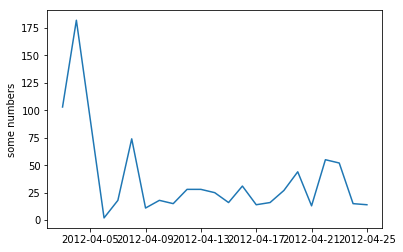

In [57]:
import matplotlib.pyplot as plt
plt.plot(histogram)
plt.ylabel('some numbers')
plt.show()

# Visualization
Geographic visualization of new infections at each iteration. Discrete and heat maps are displayed.

In [25]:
df = pd.read_csv("NYCInfectedTMSC2014.tsv",sep='\t', engine="python")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

gis = GIS()

In [26]:
df

User ID (anonymized)     Venue ID (Foursquare)  \
0                        470  49bbd6c0f964a520f4531fe3   
1                        979  4a43c0aef964a520c6a61fe3   
2                         69  4c5cc7b485a1e21e00d35711   
3                        395  4bc7086715a7ef3bef9878da   
4                         87  4cf2c5321d18a143951b5cec   
...                      ...                       ...   
227423                   688  3fd66200f964a52000e71ee3   
227424                   560  4bca32ff0687ef3be789dbcc   
227425                   945  50a77716e4b0b5a9492f6f56   
227426                   671  4514efe0f964a520e7391fe3   
227427                   942  4a1e0ca0f964a520bf7b1fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
0            4bf58dd8d48988d127951735             Arts & Crafts Store   
1            4bf58dd8d48988d1df941735                          Bridge   
2            4bf58dd8d48988d103941735                  Home (private)   
3            4bf58dd8d48988d104941735                  Medical Center   
4            4bf58dd8d48988d1cb941735                      Food Truck   
...                               ...                             ...   
227423       4bf58dd8d48988d1e7931735                     Music Venue   
227424       4bf58dd8d48988d16c941735                    Burger Joint   
227425       4bf58dd8d48988d103941735                  Home (private)   
227426       4bf58dd8d48988d11d941735                             Bar   
227427       4bf58dd8d48988d116941735                             Bar   

         Latitude  Longitude  Timezone offset(minutes)  \
0       40.719810 -74.002581                      -240   
1       40.606800 -74.044170                      -240   
2       40.716162 -73.883070                      -240   
3       40.745164 -73.982519                      -240   
4       40.740104 -73.989658                      -240   
...           ...        ...                       ...   
227423  40.733596 -74.003139                      -300   
227424  40.745719 -73.993720                      -300   
227425  40.854364 -73.883070                      -300   
227426  40.735981 -74.029309                      -300   
227427  40.726805 -73.957422                      -300   

                              UTC time  Status  Iteration  InfectorId  \
0       Tue Apr 03 18:00:09 +0000 2012       0          0           0   
1       Tue Apr 03 18:00:25 +0000 2012       0          0           0   
2       Tue Apr 03 18:02:24 +0000 2012       0          0           0   
3       Tue Apr 03 18:02:41 +0000 2012       0          0           0   
4       Tue Apr 03 18:03:00 +0000 2012       1          1          87   
...                                ...     ...        ...         ...   
227423  Sat Feb 16 02:29:11 +0000 2013       0          0           0   
227424  Sat Feb 16 02:31:35 +0000 2013       0          0           0   
227425  Sat Feb 16 02:33:16 +0000 2013       0          0           0   
227426  Sat Feb 16 02:34:31 +0000 2013       0          0           0   
227427  Sat Feb 16 02:35:36 +0000 2013       0          0           0   

        InfectionTime        Time  TestedTime  InfectionLongitude  \
0                   0  1333476009           0                 NaN   
1                   0  1333476025           0                 NaN   
2                   0  1333476144           0                 NaN   
3                   0  1333476161           0                 NaN   
4          1333476180  1333476180  1335290580          -73.989658   
...               ...         ...         ...                 ...   
227423              0  1360981751           0                 NaN   
227424              0  1360981895           0                 NaN   
227425              0  1360981996           0                 NaN   
227426              0  1360982071           0                 NaN   
227427              0  1360982136           0                 NaN   

        InfectionLatitude  
0  

In [27]:
print(infection_list[0])
print(infection_list[0].shape)

[  87  484  895   15  366  227  504  950  467  636 1063  725  184  528
  710  145  662  425   84  204   49 1034  258    4  444  125  221  772
  955  475  215 1040  530  218  287    3  599  797  884  501  922  392
  837  439 1018  762  579  190  499  298  305 1073]
(52,)


In [28]:
df.shape

(227428, 16)

In [29]:
df.columns

Index(['User ID (anonymized)', 'Venue ID (Foursquare)',
       'Venue category ID (Foursquare)', 'Venue category name (Fousquare)',
       'Latitude', 'Longitude', 'Timezone offset(minutes)', 'UTC time',
       'Status', 'Iteration', 'InfectorId', 'InfectionTime', 'Time',
       'TestedTime', 'InfectionLongitude', 'InfectionLatitude'],
      dtype='object')

In [30]:
df[df["Status"]==1]

User ID (anonymized)     Venue ID (Foursquare)  \
4                         87  4cf2c5321d18a143951b5cec   
5                        484  4b5b981bf964a520900929e3   
10                        87  4d8263a73e916dcb8edd80d2   
18                       895  4bb7e0c41261d13a8707e898   
55                        15  4b0d88b2f964a5206d4a23e3   
...                      ...                       ...   
227199                   392  4aeb7568f964a52043c221e3   
227256                   599  3fd66200f964a520dae51ee3   
227299                   837  4cce2240aa25a35dcb3b1f0f   
227336                   837  4cdfbb30db125481e0e338ce   
227365                  1040  4a5a0495f964a520a4b91fe3   

       Venue category ID (Foursquare) Venue category name (Fousquare)  \
4            4bf58dd8d48988d1cb941735                      Food Truck   
5            4bf58dd8d48988d118951735               Food & Drink Shop   
10           4bf58dd8d48988d155941735                       Gastropub   
18           4bf58dd8d48988d1e0931735                     Coffee Shop   
55           4bf58dd8d48988d1dd931735                      Soup Place   
...                               ...                             ...   
227199       4bf58dd8d48988d110941735              Italian Restaurant   
227256       4bf58dd8d48988d118941735                             Bar   
227299       4bf58dd8d48988d116941735                             Bar   
227336       4bf58dd8d48988d145941735              Chinese Restaurant   
227365       4bf58dd8d48988d175941735            Gym / Fitness Center   

         Latitude  Longitude  Timezone offset(minutes)  \
4       40.740104 -73.989658                      -240   
5       40.690427 -73.954687                      -240   
10      40.743483 -73.994009                      -240   
18      40.906627 -73.777774                      -240   
55      40.785679 -73.972834                      -240   
...           ...        ...                       ...   
227199  40.769354 -73.962981                      -300   
227256  40.737795 -74.001846                      -300   
227299  40.629034 -74.005381                      -300   
227336  40.636262 -74.008666                      -300   
227365  40.743854 -73.987898                      -300   

                              UTC time  Status  Iteration  InfectorId  \
4       Tue Apr 03 18:03:00 +0000 2012       1          1          87   
5       Tue Apr 03 18:04:00 +0000 2012       1          1         484   
10      Tue Apr 03 18:07:15 +0000 2012       1          1          87   
18      Tue Apr 03 18:11:16 +0000 2012       1          1         895   
55      Tue Apr 03 18:33:49 +0000 2012       1          1          15   
...                                ...     ...        ...         ...   
227199  Thu Feb 14 01:59:47 +0000 2013       1          0           0   
227256  Thu Feb 14 04:28:43 +0000 2013       1          0           0   
227299  Thu Feb 14 06:24:26 +0000 2013       1          0           0   
227336  Thu Feb 14 11:11:27 +0000 2013       1          0           0   
227365  Thu Feb 14 12:21:29 +0000 2013       1          0           0   

        InfectionTime        Time  TestedTime  InfectionLongitude  \
4          1333476180  1333476180  1335290580          -73.989658   
5          1333476240  1333476240  1335290640          -73.954687   
10         1333476435  1333476435  1335290835          -73.994009   
18         1333476676  1333476676  1335291076          -73.777774   
55         1333478029  1333478029  1335292429          -73.972834   
...               ...         ...         ...                 ...   
227199     1333559854  1360807187  1335374254                 NaN   
227256     1333559854  1360816123  1335374254                 NaN   
227299     1333559854  1360823066  1335374254                 NaN   
227336     1333559854  1360840287  1335374254                 NaN   
227365     1333559854  1360844489  1335374254                 NaN   

        InfectionLatitude  
4  

## Plot new and unique infections at specific iteration

SETUP:
Source: https://developers.arcgis.com/python/guide/install-and-set-up/
Create a new conda environment, activate it, and install the following packages like so:
    conda install -c esri arcgis

In [31]:
# [102, 611, 167, 58, 16, 5, 4, 1, 1, 0] 965
iteration = 1
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]
# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset="User ID (anonymized)", keep="first") 
infected_df.shape

(288, 16)

In [32]:
infected_df.head()

User ID (anonymized)     Venue ID (Foursquare)  \
4                     87  4cf2c5321d18a143951b5cec   
5                    484  4b5b981bf964a520900929e3   
18                   895  4bb7e0c41261d13a8707e898   
55                    15  4b0d88b2f964a5206d4a23e3   
64                   366  4528a216f964a520173b1fe3   

   Venue category ID (Foursquare) Venue category name (Fousquare)   Latitude  \
4        4bf58dd8d48988d1cb941735                      Food Truck  40.740104   
5        4bf58dd8d48988d118951735               Food & Drink Shop  40.690427   
18       4bf58dd8d48988d1e0931735                     Coffee Shop  40.906627   
55       4bf58dd8d48988d1dd931735                      Soup Place  40.785679   
64       4bf58dd8d48988d1fd941735                            Mall  40.734056   

    Longitude  Timezone offset(minutes)                        UTC time  \
4  -73.989658                      -240  Tue Apr 03 18:03:00 +0000 2012   
5  -73.954687                      -240  Tue Apr 03 18:04:00 +0000 2012   
18 -73.777774                      -240  Tue Apr 03 18:11:16 +0000 2012   
55 -73.972834                      -240  Tue Apr 03 18:33:49 +0000 2012   
64 -73.870847                      -240  Tue Apr 03 18:39:36 +0000 2012   

    Status  Iteration  InfectorId  InfectionTime        Time  TestedTime  \
4        1          1          87     1333476180  1333476180  1335290580   
5        1          1         484     1333476240  1333476240  1335290640   
18       1          1         895     1333476676  1333476676  1335291076   
55       1          1          15     1333478029  1333478029  1335292429   
64       1          1         366     1333478376  1333478376  1335292776   

    InfectionLongitude  InfectionLatitude  
4           -73.989658          40.740104  
5           -73.954687          40.690427  
18          -73.777774          40.906627  
55          -73.972834          40.785679  
64          -73.870847          40.734056

# Visualize Spatially
Convert to Spatially Enabled DataFrame

## IMPORTANT: Load maps by running corresponding cell pairs for rendering maps, for example (both of these cells need to be executed in order for the maps to render with spatial plots). Wait for the base map finish rendering, then run the cell for rendering spatial plots:
Cell 1: Renders basemap
```
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc
```

Cell 2: Renders spatial plots onto map
```
infected_df.spatial.plot(map_widget=pdx_map_nyc)
```

In [33]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
type(sdf)

pandas.core.frame.DataFrame

In [34]:
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [35]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

/home/mayuresh/anaconda3/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2380: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


True

## Explore density of infections
These heatmaps may take a couple minutes to render

In [36]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Plot cumulative infections at specific iteration

### Cumulative infections at iteration 1

In [38]:
iteration = 1
isInfected = df["Status"]==1
isSelectedIter = df["Iteration"]==iteration

infected_df = df[isInfected & isSelectedIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df

User ID (anonymized)     Venue ID (Foursquare)  \
4                        87  4cf2c5321d18a143951b5cec   
5                       484  4b5b981bf964a520900929e3   
18                      895  4bb7e0c41261d13a8707e898   
55                       15  4b0d88b2f964a5206d4a23e3   
64                      366  4528a216f964a520173b1fe3   
...                     ...                       ...   
35089                   466  41abb800f964a520581e1fe3   
35635                   478  4840fe6bf964a52030501fe3   
35688                    57  49b6d0b4f964a52012531fe3   
35836                   170  42829c80f964a5205f221fe3   
35890                   939  4840fe6bf964a52030501fe3   

      Venue category ID (Foursquare) Venue category name (Fousquare)  \
4           4bf58dd8d48988d1cb941735                      Food Truck   
5           4bf58dd8d48988d118951735               Food & Drink Shop   
18          4bf58dd8d48988d1e0931735                     Coffee Shop   
55          4bf58dd8d48988d1dd931735                      Soup Place   
64          4bf58dd8d48988d1fd941735                            Mall   
...                              ...                             ...   
35089       4bf58dd8d48988d1db931735                Tapas Restaurant   
35635       4bf58dd8d48988d1fe931735                     Bus Station   
35688       4bf58dd8d48988d124941735                          Office   
35836       4bf58dd8d48988d124941735                          Office   
35890       4bf58dd8d48988d1fe931735                     Bus Station   

        Latitude  Longitude  Timezone offset(minutes)  \
4      40.740104 -73.989658                      -240   
5      40.690427 -73.954687                      -240   
18     40.906627 -73.777774                      -240   
55     40.785679 -73.972834                      -240   
64     40.734056 -73.870847                      -240   
...          ...        ...                       ...   
35089  40.734524 -73.998266                      -240   
35635  40.757221 -73.991547                      -240   
35688  40.740507 -73.986908                      -240   
35836  40.713844 -74.014201                      -240   
35890  40.757221 -73.991547                      -240   

                             UTC time  Status  Iteration  InfectorId  \
4      Tue Apr 03 18:03:00 +0000 2012       1          1          87   
5      Tue Apr 03 18:04:00 +0000 2012       1          1         484   
18     Tue Apr 03 18:11:16 +0000 2012       1          1         895   
55     Tue Apr 03 18:33:49 +0000 2012       1          1          15   
64     Tue Apr 03 18:39:36 +0000 2012       1          1         366   
...                               ...     ...        ...         ...   
35089  Tue Apr 24 22:20:10 +0000 2012       1          1         392   
35635  Wed Apr 25 12:42:03 +0000 2012       1          1           4   
35688  Wed Apr 25 13:00:42 +0000 2012       1          1         499   
35836  Wed Apr 25 13:54:19 +0000 2012       1          1         392   
35890  Wed Apr 25 14:23:14 +0000 2012       1          1           4   

       InfectionTime        Time  TestedTime  InfectionLongitude  \
4         1333476180  1333476180  1335290580          -73.989658   
5         1333476240  1333476240  1335290640          -73.954687   
18        1333476676  1333476676  1335291076          -73.777774   
55        1333478029  1333478029  1335292429          -73.972834   
64        1333478376  1333478376  1335292776          -73.870847   
...              ...         ...         ...                 ...   
35089     1335306010  1335306010  1337120410          -73.998266   
35635     1335357723  1335357723  1337172123          -73.991547   
35688     1335358842  1335358842  1337173242          -73.986908   
35836     1335362059  1335362059  1337176459          -74.014201   
35890     1335363794  1335363794  1337178194          -73.991547   

       InfectionLatitude  
4              40.740104  
5              40.690427  
18       

In [39]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [40]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

/home/mayuresh/anaconda3/lib/python3.7/site-packages/arcgis/features/geo/_accessor.py:2380: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime)):


True

### Explore density of infections for cumulative infections (Iteration 1)

In [41]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [42]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Plot cumulative infections from iteration 0-total iteration count

In [43]:
isInfected = df["Status"]==1
isLTETotalIter = df["Iteration"] <= iteration_count
# hasInfectionLocation = pd.notnull(df["InfectionLatitude"])

infected_df = df[isInfected & isLTETotalIter]

# dropping ALL duplicate values 
infected_df = infected_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
infected_df.shape

(401, 16)

In [44]:
sdf = pd.DataFrame.spatial.from_xy(infected_df, 'InfectionLongitude','InfectionLatitude')
pdx_map_nyc = gis.map('New York City, NY')
pdx_map_nyc.basemap = 'topo'
pdx_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [45]:
infected_df.spatial.plot(map_widget=pdx_map_nyc)

True

### Explore density of infections for cumulative infections (Iteration 0-total iteration count)

In [46]:
pdx_density_map_nyc = gis.map('New York City, NY')
pdx_density_map_nyc.basemap='gray'
pdx_density_map_nyc

MapView(layout=Layout(height='400px', width='100%'))

In [47]:
infected_df.spatial.plot(map_widget=pdx_density_map_nyc, renderer_type='h')

True

## Line plot new infections over time

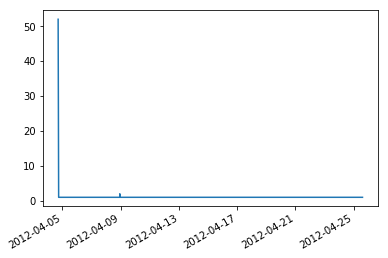

In [48]:
import matplotlib.pyplot as plt

# start from infect_time
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

fig, ax = plt.subplots()
newInfectionsList = filtered_df["InfectionTime"].value_counts().sort_index().plot(ax=ax)

# Uncomment to use parameters for changing x-axis and y-axis intervals
# graph.set_xlim(pd.Timestamp('2012-04-15'), pd.Timestamp('2013-01-11'))
# graph.set_ylim(0, 120)

fig.savefig('NewInfections.pdf')

## Line plot cumulative new infections over time

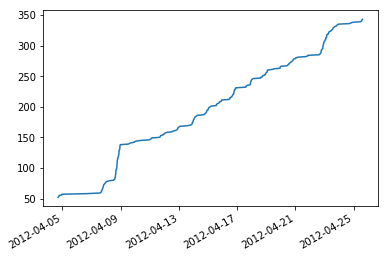

In [49]:
filtered_df = df[df["InfectionTime"] >= infect_time]
filtered_df = filtered_df.drop_duplicates(subset=["User ID (anonymized)", "Iteration"], inplace=False, keep="first") 
filtered_df["InfectionTime"] = pd.to_datetime(filtered_df["InfectionTime"],unit='s')

fig, ax = plt.subplots()

# Construct dataframe of infectionTime to it's frequency
infectionTime_freq_df = pd.DataFrame({"InfectionTime":filtered_df["InfectionTime"].value_counts().index})

cumulatedFrequencyList = filtered_df["InfectionTime"].value_counts().sort_index().cumsum().plot(ax=ax)
fig.savefig('CumulativeInfections.pdf')